In [ ]:
# Load HDMSpectra
from HDMSpectra import HDMSpectra

# Import numpy
import numpy as np

# Import scipy
from scipy import integrate, interpolate, optimize


# Import DataFrame
import pandas as pd

# Import memory clear module
import gc


# Plotting defaults
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['legend.frameon'] = False
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

cm = plt.get_cmap('jet')

# Fermi-LAT Section

Read datas of gamma-ray excess from Fermi-LAT

In [ ]:
# Read Fermi data from CSV file
fermi = pd.read_csv("fermi_excess_reduced.csv")


# Extract specific data columns
Ebin = fermi['Ebin'].to_numpy() # Energy bin (Ebin)
obs = fermi['obs'].to_numpy() # Observed data
down_err = fermi['down_err'].to_numpy() # Observed data
up_err = fermi['up_err'].to_numpy() # Upward error

Plot the observed data of gamma-ray excess by Fermi-LAT

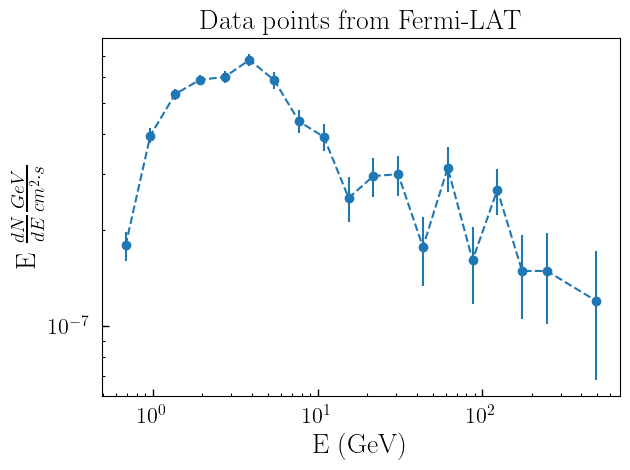

In [ ]:
# Create an error bar plot
plt.errorbar(Ebin, obs, yerr=[down_err, up_err], label='Observation', linestyle='--', marker='o')

# Customize plot elements
plt.title('Data points from Fermi-LAT')
plt.xlabel(r'E (GeV)')
plt.ylabel(r'E $\frac{dN}{dE} \frac{GeV}{cm^2 \cdot s}$')  # Use LaTeX formatting for proper unit display
plt.xscale('log')  # Set logarithmic scale for x-axis (energy)
plt.yscale('log')  # Set logarithmic scale for y-axis (differential number density)
plt.tight_layout()  # Adjust spacing between elements for better readability
plt.show()  # Display the plot


# Dark Matter density and J-factor Section

* Dark matter density

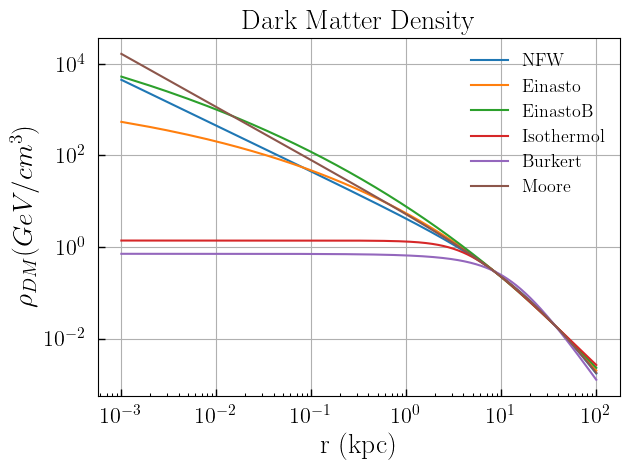

In [ ]:
# Decalre necessary constants
NFW = lambda r,rs=24.42,rhos=0.184: rhos*(rs/r)*((1 + (r/rs))**-2)
Ein = lambda r,alpha=0.17,rs=28.44,rhos=0.033: rhos*np.exp((-2/alpha)*(((r/rs)**alpha) - 1))
EinB = lambda r,alpha=0.11,rs=35.24,rhos=0.021: rhos*np.exp((-2/alpha)*(((r/rs)**alpha) - 1))
Iso = lambda r,rs=4.38,rhos=1.387: rhos/(1 + (r/rs)**2)
Burkert = lambda r,rs=12.67,rhos=0.712: rhos/((1 + r/rs)*(1 + (r/rs)**2))
Moore = lambda r,rs=30.28,rhos=0.105: rhos*(rs/r)**1.16 * (1 + r/rs)**-1.84


# Create lists to contain dark matter density from each dark matter density model
NFW_density_list = []
Ein_density_list = []
EinB_density_list = []
Iso_density_list = []
Burkert_density_list = []
Moore_density_list = []


# Do for-loop to find the dark matter density from each model
for r in np.arange(10**-3,10**2,10**-3):
  NFW_density_list.append(NFW(r))
  Ein_density_list.append(Ein(r))
  EinB_density_list.append(EinB(r))
  Iso_density_list.append(Iso(r))
  Burkert_density_list.append(Burkert(r))
  Moore_density_list.append(Moore(r))


# Plot the dark matter density graph from dark matter density model
r = np.arange(10**-3,10**2,10**-3)
plt.plot(r,NFW_density_list,label="NFW")
plt.plot(r,Ein_density_list,label="Einasto")
plt.plot(r,EinB_density_list,label="EinastoB")
plt.plot(r,Iso_density_list,label="Isothermol")
plt.plot(r,Burkert_density_list,label="Burkert")
plt.plot(r,Moore_density_list,label="Moore")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title("Dark Matter Density")


# Plotting default of this graph
plt.xlabel('r (kpc)')
plt.ylabel(r'$\rho_{DM} (GeV/cm^3)$')
plt.grid("true")
plt.tight_layout()
plt.show()

* J-factor

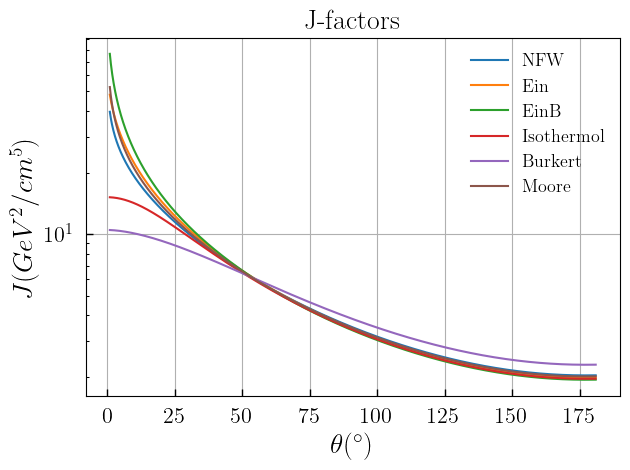

In [ ]:
# Decalre necessary constants
Rsc = 8.33 #kpc
rhosc = 0.47 #GeV/cm^3
Rmw = 26.8 #kpc


# Create lists to contain J-factor value of each dark matter density model
psi = []
NFW_J_list = []
Ein_J_list = []
EinB_J_list = []
Iso_J_list = []
Burkert_J_list = []
Moore_J_list = []
integral = []


# From a J-factor function
J = lambda f: integrate.quad(f,0,lmax)[0]
r = lambda l: np.sqrt(Rsc**2 + l**2 - 2*Rsc*l*np.cos(np.radians(i)))
NFW = lambda l,rs=24.42,rhos=0.184: rhos*(rs/r(l))*((1 + (r(l)/rs))**-2)
Ein = lambda l,alpha=0.17,rs=28.44,rhos=0.033: rhos*np.exp((-2/alpha)*(((r(l)/rs)**alpha) - 1))
EinB = lambda l,alpha=0.11,rs=35.24,rhos=0.021: rhos*np.exp((-2/alpha)*(((r(l)/rs)**alpha) - 1))
Iso = lambda l,rs=4.38,rhos=1.387: rhos/(1 + (r(l)/rs)**2)
Burkert = lambda l,rs=12.67,rhos=0.712: rhos/((1 + r(l)/rs)*(1 + (r(l)/rs)**2))
Moore = lambda l,rs=30.28,rhos=0.105: rhos*(rs/r(l))**1.16 * (1 + r(l)/rs)**-1.84


# For-loop of finding J-factor of each dark matter density model
n = 180 #degree unit
delta = 0.1
for i in np.arange(1,n + 1,delta):
  lmax = np.sqrt(Rmw**2 - (Rsc**2)*np.sin(np.radians(i))) + Rsc*np.cos(np.radians(i))
  psi.append(i)
  NFW_J_list.append(J(NFW))
  Ein_J_list.append(J(Ein))
  EinB_J_list.append(J(EinB))
  Iso_J_list.append(J(Iso))
  Burkert_J_list.append(J(Burkert))
  Moore_J_list.append(J(Moore))

integrated_J_NFW = integrate.simpson(NFW_J_list, dx=delta)
integrated_J_Ein = integrate.simpson(Ein_J_list, dx=delta)
integrated_J_EinB = integrate.simpson(EinB_J_list, dx=delta)
integrated_J_Iso = integrate.simpson(Iso_J_list, dx=delta)
integrated_J_Burkert = integrate.simpson(Burkert_J_list,dx=delta)
integrated_J_Moore = integrate.simpson(Moore_J_list, dx=delta)
integrated = [integrated_J_NFW,integrated_J_Ein,integrated_J_EinB,integrated_J_Iso,integrated_J_Burkert,integrated_J_Moore]

plt.plot(psi,NFW_J_list,label="NFW")
plt.plot(psi,Ein_J_list,label="Ein")
plt.plot(psi,EinB_J_list,label="EinB")
plt.plot(psi,Iso_J_list,label="Isothermol")
plt.plot(psi,Burkert_J_list,label="Burkert")
plt.plot(psi,Moore_J_list,label="Moore")
plt.yscale("log")
plt.legend()
plt.grid("true")
plt.tight_layout()
plt.xlabel(r'$\theta (^\circ)$')
plt.ylabel(r'$J(GeV^2/cm^5)$')
plt.title('J-factors')
plt.tight_layout()
plt.show()

# CascadeSpectra + HDMSpectra

In this section, we will find the

* dNdE function

In [ ]:
# Define dNdE as a functional
def dNdE(mDM, initialstate):  # This function returns two values, Energy of dark matter, E, and the number density, dNdE

    # If mass less than 500 GeV then u, d, s define as q
    if mDM < 500:
        # Cascade Spectra, we use this software due to the limitation of HDMSpectra; cannot produce dark matter mass that is less than 500 GeV
        filename = 'CascadeSpectra/Spectra/AtProduction_gammas.dat'  # Cascade Spectra

        # Annihilation process
        with open(filename) as f:
            lines = (line for line in f if not line.startswith('#'))  # Skip commented lines
            data = np.genfromtxt(lines, names=True, dtype=None)  # Load data from file

        massvals = data["mDM"]
        index = np.where(np.abs((massvals - mDM) / mDM) < 1.e-3)  # Find data closest to mDM
        xvals = 10**(data["Log10x"][index])  # x = E/mDM (energy fraction)

        # Interpolate flux data for given mass
        flux = data[initialstate][index] / (np.log(10) * xvals)
        loadspec = interpolate.interp1d(xvals, flux)

        def dNdx(x):
            fluxval = loadspec(x)
            # Return 0 for energies greater than 1 or negative flux values (unphysical)
            if (x > 1 or fluxval < 0):
                return 0
            else:
                return fluxval

        E = mDM * xvals  # Energy (E = x * mDM)
        dNdE = [(1 / mDM) * dNdx(x) for x in xvals]  # Number density (dNdE = dNdx / mDM)

    else:  # HDM Spectra, we use it until the dark matter mass is not exceed 10^19 GeV
        data = 'HDMSpectra-master/data/HDMSpectra.hdf5'  # Location of HDF5 file

        x = np.logspace(-4., 0., 1000)  # Energy fraction values (x = 2E/mDM)

        # Extract the spectrum using HDMSpectra.spec
        dNdx = HDMSpectra.spec(22, initialstate, x, mDM, data, annihilation=True)

        E = x * mDM / 2  # Energy (E = x * mDM / 2)
        dNdE = dNdx * 2 / mDM  # Number density (dNdE = dNdx * 2 / mDM, considering annihilation)

    return E, dNdE


* Choose Dark matter mass

In [ ]:
# Find mDM that > E_gamma for every E_gamma in Ebin
test_mDM = ([5, 6, 8, 10, 300, 330, 360, 400, 450]
          + [*range(30, 150 + 10, 10)]
          + [*range(160, 280 + 20, 20)]
          + [*range(500, 950 + 50, 50)] # Define it to match with the datas of Ebin from PPPC4DM code (CascadeSpectra)
          + [*range(1000, 1000*1000 + 100, 100)]) # From 1000 GeV on, it depends on your decision, you may stop here, or may continue until 10^19 (Followed HDMSpectra's energy limitation)


# Sort test_mDM masses in ascending order
test_mDM.sort()


# Screening dark matter mass (list of lists)
DM_mass =[]
for i in range(len(Ebin)):  # Loop through each gamma-ray excess energy (Ebin)
    list = []
    for j in range(len(test_mDM)):  # Loop through each dark matter mass (test_mDM)
        if Ebin[i] > test_mDM[j]: # Check if E_gamma > mDM
            list.append(0)  # Exclude mDM if E_gamma <= mDM (unphysical)
        else:
            list.append(test_mDM[j])  # Include mDM if E_gamma > mDM
    DM_mass.append(list)  # Store screened masses for each Ebin

# Check the number of dark matter masses after screening for the first Ebin
print(len(DM_mass))

# As a result, we obtain the list DM_mass[i][j], where i is the Ebin size, and j is the gdark matter mass in each Ebin.

* dPdE_gamma

In [ ]:
# Declare 2 variable for mass < 500 GeV, and > 500 GeV
particles_5 = ['q','q','q','c','b','t','e','nue','mu','numu','tau','nutau','g','gamma','Z','W','h'] # 5 in this case refer to the minimum energy that the code of PPPC4DM can produce, so this is perticle product from PPPC4DM code, CascadeSpectra
particles_500 = ['d','u','s','c','b','t','e','nue','mu','numu','tau','nutau','g','gamma','Z','W','h'] # 500 refer to the 500 GeV, which we will switch the software into HDMSpectra

In [ ]:
# Loop through particles for analysis, used particles_500 list due to general case
for i in range(len(particles_500)):
    print(particles_500[i]) # To show the process

    # Initialize list to store results for each gamma-ray excess energy, it just a temporary list
    list = []

    # Loop through each gamma-ray excess energy (Ebin)
    for j in range(len(Ebin)):

        sub_list = [] # Initialize sub-list for current Ebin, temporary

        # Loop through screened dark matter masses (DM_mass)
        for k in range(len(DM_mass[0])):
            if DM_mass[j][k] == 0:
              # Exclude masses filtered during screening
                sub_list.append(0)

            # When the energy is less than 500 GeV, it's in the realm of PPPC4DM (CascadeSpectra), in this scope, the d, u, and s quarks are define as 'q'
            elif DM_mass[j][k] < 500:
                E, dPdE = dNdE(DM_mass[j][k], particles_5[i])
                interp = np.interp(Ebin[j], E, dPdE)
                sub_list.append(interp)

            # When the energy is more than 500 GeV, we switch to use HDMSpectra
            elif DM_mass[j][k] >= 500:
                E, dPdE = dNdE(DM_mass[j][k], particles_500[i])
                interp = np.interp(Ebin[j], E, dPdE)
                sub_list.append(interp)

        list.append(sub_list)


    # Create pandas DataFrame and save to CSV
    df = pd.DataFrame(list)
    df.to_csv('dPdE_gamma/{}.csv'.format(particles_500[i]), header=DM_mass[0], index=False) # Save the product into dPdE_gamma directory
    gc.collect()  # Optional garbage collection

# Note: W boson might return 0 for some energies, potentially due to HDMSpectra limitations.


# As a result, we obtain the the possibly dark matter mass in each energy bin, as shown in dPdE_gamma directory

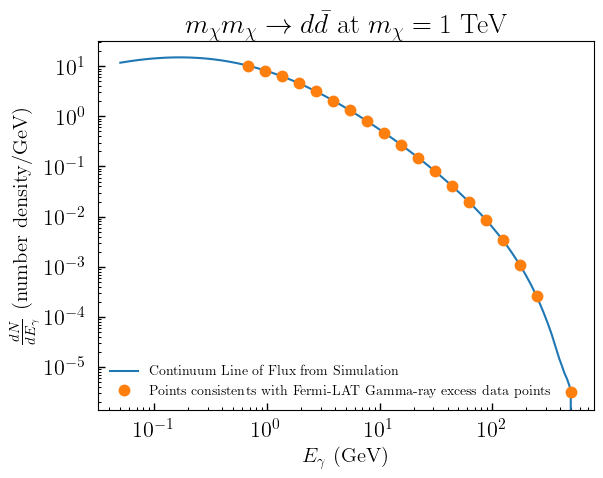

In [ ]:
# Calculate differential number density (dNdE) for the given mass and particle
E_gamma, dNdE_d = dNdE(1000, 'd') # Sample dark matter mass at 1TeV, Sample particle name ('d' in this case)


# Plot simulated continuum line
plt.plot(E_gamma, dNdE_d, label='Continuum Line of Flux from Simulation')


# Interpolate dNdE values for Fermi-LAT energy bins (Ebin)
plt.plot(Ebin, np.interp(Ebin, E_gamma, dNdE_d), '.', markersize=15, label='Points consistents with Fermi-LAT Gamma-ray excess data points')


plt.xscale('log')
plt.yscale('log')
plt.title(r'$m_\chi m_\chi \rightarrow d\bar{d}$ at $m_\chi=1$ TeV', fontsize=20)
plt.xlabel(r'$E_\gamma$ (GeV)', fontsize=15)
plt.ylabel(r'$\frac{dN}{dE_\gamma}$ (number density/GeV)', fontsize=15)
plt.legend(fontsize=10)
plt.show()

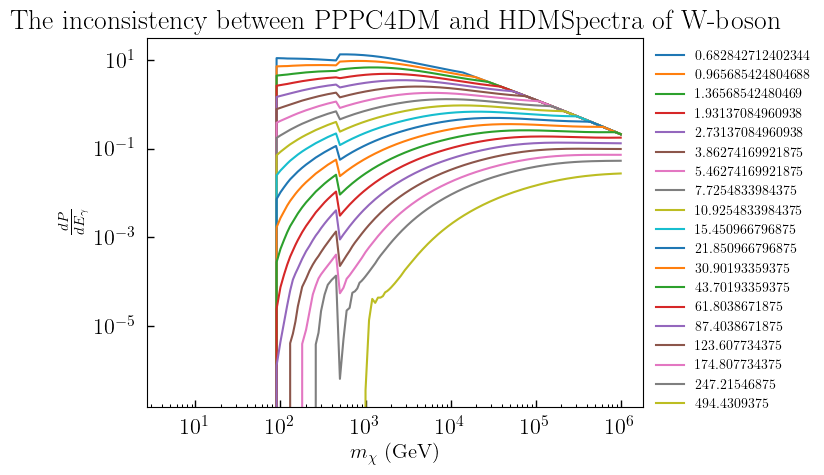

In [ ]:
# Calculate differential number density (dNdE) for the given mass and particle


dPdE_sample = np.array(pd.read_csv('dPdE_gamma/W.csv')) # Sample dark matter mass at 1TeV, Sample particle name ('d' in this case)


# Plot the inconsistance from PPPC4DM and CascadeSpectra
for i in range(len(Ebin)):
  #print(i)
  plt.plot(DM_mass[0], dPdE_sample[i], label = Ebin[i]) # To show each dPdE from every Ebin


plt.xscale('log')
plt.yscale('log')
plt.title('The inconsistency between PPPC4DM and HDMSpectra of W-boson', fontsize=20)
plt.xlabel(r'$m_\chi$ (GeV)', fontsize=15)
plt.ylabel(r'$\frac{dP}{dE_\gamma}$', fontsize=15)
plt.legend(fontsize=10, bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-33-60754e44ba19>:4: RuntimeWarning: invalid value encountered in scalar divide
  dPdE_sample_scaling = dPdE_sample[i][29]/dPdE_sample[i][28]
<ipython-input-33-60754e44ba19>:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([-1, 10])


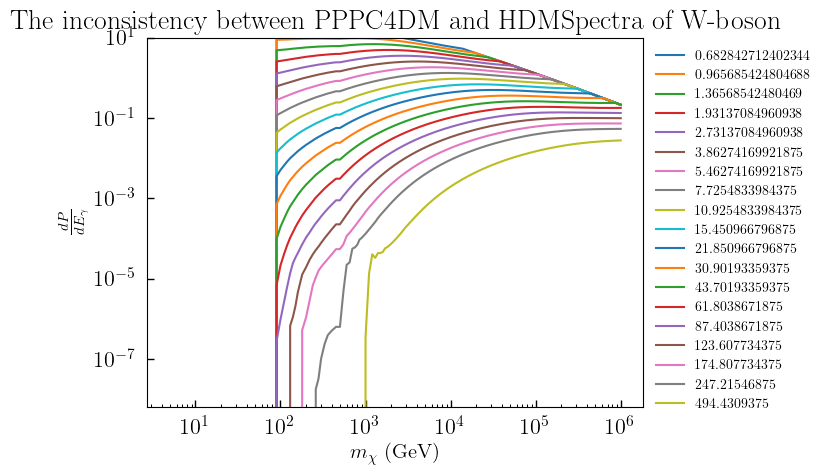

In [ ]:
dPdE_sample_scaling = []
dPdE_new_sample = []
for i in range(len(Ebin)):
  dPdE_sample_scaling = dPdE_sample[i][29]/dPdE_sample[i][28]
  scaled_part = [x * dPdE_sample_scaling for x in dPdE_sample[i][:29]]
  remaining_part = dPdE_sample[i][29:].tolist()
  dPdE_new_sample.append(scaled_part + remaining_part)


for i in range(len(Ebin)):
  plt.plot(DM_mass[0], dPdE_new_sample[i], label = Ebin[i]) # To show each dPdE from every Ebin

plt.xscale('log')
plt.yscale('log')
plt.title('The inconsistency between PPPC4DM and HDMSpectra of W-boson', fontsize=20)
plt.xlabel(r'$m_\chi$ (GeV)', fontsize=15)
plt.ylabel(r'$\frac{dP}{dE_\gamma}$', fontsize=15)
plt.ylim([-1, 10])
plt.legend(fontsize=10, bbox_to_anchor=(1, 1))
plt.show()

dPdE_gamma_modified, to cover up the inconsistent of those 2 models

In [ ]:
for i in range(len(particles_500)):
  print(particles_500[i])
  dPdE_prepared = pd.read_csv('dPdE_gamma/{}.csv'.format(particles_500[i])).to_numpy()
  dPdE_modified = []
  for j in range(len(Ebin)):
    dPdE_scaling = dPdE_prepared[j][29]/dPdE_prepared[j][28]
    scaled_part = [x * dPdE_scaling for x in dPdE_prepared[j][0:29]]
    remaining_part = dPdE_prepared[j][29:].tolist()
    dPdE_modified.append(scaled_part + remaining_part)
  df_dPdE_modified = pd.DataFrame(dPdE_modified)
  df_dPdE_modified.to_csv('dPdE_gamma_modified/{}.csv'.format(particles_500[i]), header=DM_mass[0], index=False) # Save the product into dPdE_gamma directory

# Portal Dark Matter model

* Emin & Emax

$\lambda_\phi=\sqrt{1-(m_\phi/m_\chi)^2} \quad , \quad \lambda_j=\sqrt{1-(2m_j/m_\phi)^2}$

$E^\phi_{min}=(\frac{m_\chi}{2})(1-\lambda_\phi\lambda_j) \quad , \quad E_{max}^\phi=(\frac{m_\chi}{2})(1+\lambda_\phi\lambda_j)$



In [ ]:
# Define particle names (same order as mj list)
particles = ['d', 'u', 's', 'c', 'b', 't', 'e', 'nue', 'mu', 'numu', 'tau', 'nutau', 'g', 'gamma', 'Z', 'W', 'h']

# Define mediator particle masses (GeV) - one for each particle in 'particles' list
mj = [0.0047, 0.0022, 0.096, 1.28, 4.18, 173.1, 0.000511, 0.000001, 0.10566, 0.00017, 1.7768, 0.0182, 0, 0, 91.19, 80.36, 124.97]

# Create a list of dark matter masses (mDM) to explore (logarithmic spacing)
mDM = np.logspace(3, 5, 100)  # 100 elements from 1 TeV to 100 TeV

# Initialize empty lists to store minimum and maximum gamma-ray energies (E_mediator) for each mediator particle
E_mediator_min = []
E_mediator_max = []

# Loop through each mediator particle (indexed by 'i')
for i in range(len(mj)):
    # Initialize empty lists to store minimum and maximum E_mediator for each dark matter mass (mDM)
    list_min = []
    list_max = []

    # Loop through each dark matter mass (mDM)
    for j in range(len(mDM)):
        # Calculate mediator mass (half of the dark matter mass)
        m_mediator = mDM[j] / 2

        # Kinematic factors (lambda)
        lambda_phi = np.sqrt(1 - (m_mediator / mDM[j])**2)  # Lambda phi
        lambda_j = np.sqrt(1 - (2 * mj[i] / m_mediator)**2)  # Lambda j

        # Minimum and maximum possible gamma-ray energies for the current mDM and mediator
        min_e_mediator = (mDM[j] / 2) * (1 - lambda_phi * lambda_j)
        max_e_mediator = (mDM[j] / 2) * (1 + lambda_phi * lambda_j)

        # Append minimum and maximum E_mediator for the current mDM to their respective lists
        list_min.append(min_e_mediator)
        list_max.append(max_e_mediator)

    # Append the lists containing min and max E_mediator for all mDM to the main lists for the current mediator particle
    E_mediator_min.append(list_min)
    E_mediator_max.append(list_max)

# Now, E_mediator_min and E_mediator_max are 2D lists:
# - E_mediator_min[i][j]: minimum E_mediator for j-th dark matter mass (mDM) of the i-th mediator particle (particles[i])
# - E_mediator_max[i][j]: maximum E_mediator for j-th dark matter mass (mDM) of the i-th mediator particle (particles[i])


* dPdE_mediator

$ \frac{dP}{dE}_{\phi}=\frac{4}{\pi m_\chi}\frac{\sqrt{(1-(\frac{m_\phi}{m_\chi})^2)(1-(\frac{2m_j}{m_\chi})^2)-(1-\frac{2E_j}{m_\chi})^2}}{(1-(\frac{m_\phi}{m_\chi})^2)(1-(\frac{2m_j}{m_\phi})^2)}$

In [ ]:
dPdE_mediator = []
for i in range(len(mj)):
    #print('j:',particles[i])
    list = []
    for j in range(len(mDM)):
        sublist = []
        for k in range(len(Ebin)):
            #print('j:', particles[i], ', Ebin:', Ebin[j], ', mDM:', DM_mass[k])
            m_mediator = mDM[j]/2
            #print((1 - (m_mediator/DM_mass[k])**2), (1 - (2*mj[i]/m_mediator)**2), (1 - 2*Ebin[j]/DM_mass[k])**2)
            dPdE_m = ((4/(np.pi*mDM[j]))
                     *np.sqrt(abs((1 - (m_mediator/mDM[j])**2)*(1 - (2*mj[i]/m_mediator)**2) - (1 - 2*Ebin[k]/mDM[j])**2))
                     /((1 - (m_mediator/mDM[j])**2)*(1 - (2*mj[i]/m_mediator)**2)))
            sublist.append(dPdE_m)
        list.append(sublist)
    dPdE_mediator.append(list)

In [ ]:
# Initialize an empty list to store the differential number density (dPdE) for the mediator particle
dPdE_mediator = []

# Loop through each mediator particle mass (mj)
for i in range(len(mj)):
    # Optional print statement to track progress (can be commented out)
    # print('j:', particles[i])  # Particles[i] corresponds to the current mediator particle

    # Initialize an empty list to store dPdE values for each dark matter mass (mDM) for the current mediator particle
    list_for_mDM = []

    # Loop through each dark matter mass (mDM)
    for j in range(len(mDM)):
        # Initialize an empty list to store dPdE values for each gamma-ray excess energy (Ebin) for the current mDM and mediator
        sublist_for_Ebin = []

        # Loop through each gamma-ray excess energy (Ebin)
        for k in range(len(Ebin)):
            # Optional print statement to track progress in more detail (can be commented out)
            # print('j:', particles[i], ', Ebin:', Ebin[j], ', mDM:', DM_mass[k])

            # Calculate the mediator mass (half of the dark matter mass)
            m_mediator = mDM[j] / 2

            # Calculate the phase space factor (commented out for brevity)
            # print((1 - (m_mediator/DM_mass[k])**2), (1 - (2*mj[i]/m_mediator)**2), (1 - 2*Ebin[j]/DM_mass[k])**2)

            # Calculate the differential number density (dPdE) for the mediator particle
            # This calculation likely depends on specific particle physics models.
            dPdE_m = ((4 / (np.pi * mDM[j]))
                       * np.sqrt(abs((1 - (m_mediator / mDM[j])**2) * (1 - (2 * mj[i] / m_mediator)**2) - (1 - 2 * Ebin[k] / mDM[j])**2))
                       / ((1 - (m_mediator / mDM[j])**2) * (1 - (2 * mj[i] / m_mediator)**2)))
            sublist_for_Ebin.append(dPdE_m)

        # Append the sublist containing dPdE for all Ebin for the current mDM to the list for the current mediator particle
        list_for_mDM.append(sublist_for_Ebin)

    # Append the list containing dPdE for all mDM for the current mediator particle to the main list
    dPdE_mediator.append(list_for_mDM)

# The resulting dPdE_mediator contains a 3D structure:
# - dPdE_mediator[i]: data for i-th mediator particle (likely corresponding to particles[i])
# - dPdE_mediator[i][j]: data for j-th dark matter mass (mDM) for the i-th mediator particle
# - dPdE_mediator[i][j][k]: dPdE value for k-th gamma-ray excess energy (Ebin) for the j-th mDM and i-th mediator particle


* dNdE

$\frac{dN}{dE}_{\phi_1\phi_2}=\int_{E_{min}}^{E_{max}}dE_j(\frac{dP}{dE_\gamma})_{jj}(\frac{dP}{dE_j})_{\phi_1}+\int_{E_{min}}^{E_{max}}dE_{j^{'}}(\frac{dP}{dE_\gamma})_{j^{'}j^{'}}(\frac{dP}{dE_j^{'}})_{\phi_2}$

In [ ]:
# Initialize an empty list to store the differential number density (dNdE) for dark matter (DM)
dNdE_DM = []

# Loop through each particle type (indexed by 'i')
for i in range(len(particles)):
    # Print particle name for tracking progress (can be commented out)
    print(particles[i])

    # Read differential number density (dPdE) data for the current particle from a CSV file
    dPdE_gamma = pd.read_csv('dPdE_gamma_modified/{}.csv'.format(particles[i])).to_numpy()


    print(dPdE_gamma)


    # Initialize an empty list to store dNdE for each dark matter mass (mDM) for the current particle
    list_for_mDM = []

    # Loop through each dark matter mass (mDM)
    for j in range(len(mDM)):
        # Initialize an empty list to store dNdE for each gamma-ray excess energy (Ebin) for the current mDM and particle
        sublist_for_Ebin = []

        # Loop through each gamma-ray excess energy (Ebin) (commented out integration code)
        for k in range(len(Ebin)):
            # This commented code block demonstrates two potential integration methods (Simpson's rule and cubic spline integration)
            # Limit the integration range based on minimum and maximum E_mediator for current mDM and particle (commented out)
            # limit = np.linspace(E_mediator_min[i][j], E_mediator_max[i][j], len(dPdE_gamma[k]))
            # integrated = integrate.simpson(dPdE_gamma[k] * dPdE_mediator[i][j][k], limit)

            # Perform cubic spline interpolation on dPdE_gamma with respect to DM_mass
            intpl = interpolate.CubicSpline(DM_mass[0], dPdE_gamma[k])

            # Integrate the interpolated dPdE_gamma over the range of E_mediator using numerical quadrature (quad function)
            integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]

            # Alternative: Simpson's rule integration (commented out)
            # integrated = simpsons_rule(dPdE_gamma[k] * dPdE_mediator[i][j][k], E_mediator_min[i][j], E_mediator_max[i][j], 1000)

            # Multiply the integrated value by 2 (Factor based on the annihilation process)
            sublist_for_Ebin.append(2 * integrated)

        # Append the sublist containing dNdE for all Ebin for the current mDM to the list for the current particle
        list_for_mDM.append(sublist_for_Ebin)

    # Append the list containing dNdE for all mDM for the current particle to the main list
    dNdE_DM.append(list_for_mDM)

# Now, dNdE_DM is a 3D list containing the differential number density for dark matter:
# - dNdE_DM[i]: data for i-th particle type (particles[i])
# - dNdE_DM[i][j]: data for j-th dark matter mass (mDM) for the i-th particle
# - dNdE_DM[i][j][k]: dNdE value for k-th gamma-ray excess energy (Ebin) for the j-th mDM and i-th particle


In [ ]:
# Initialize an empty list to store the differential number density (dNdE) for dark matter (DM)
dNdE_DM = []

# Loop through each particle type (indexed by 'i')
for i in range(len(particles)):
    # Print particle name for tracking progress (can be commented out)
    print(particles[i])

    # Read differential number density (dPdE) data for the current particle from a CSV file
    dPdE_gamma = pd.read_csv('dPdE_gamma_modified/{}.csv'.format(particles[i])).to_numpy()

    # Initialize an empty list to store dNdE for each dark matter mass (mDM) for the current particle
    list_for_mDM = []

    # Loop through each dark matter mass (mDM)
    for j in range(len(mDM)):
        # Initialize an empty list to store dNdE for each gamma-ray excess energy (Ebin) for the current mDM and particle
        sublist_for_Ebin = []

        # Loop through each gamma-ray excess energy (Ebin) (commented out integration code)
        for k in range(len(Ebin)):
            # Check for non-finite values in dPdE_gamma[k] and handle them
            if not np.all(np.isfinite(dPdE_gamma[k])):
                print(f"Warning: Non-finite values found in dPdE_gamma for particle {particles[i]}, Ebin index {k}. Replacing with zeros.")
                dPdE_gamma[k] = np.where(np.isfinite(dPdE_gamma[k]), dPdE_gamma[k], 0)  # Replace non-finite values with 0

            # This commented code block demonstrates two potential integration methods (Simpson's rule and cubic spline integration)
            # Limit the integration range based on minimum and maximum E_mediator for current mDM and particle (commented out)
            # limit = np.linspace(E_mediator_min[i][j], E_mediator_max[i][j], len(dPdE_gamma[k]))
            # integrated = integrate.simpson(dPdE_gamma[k] * dPdE_mediator[i][j][k], limit)

            # Perform cubic spline interpolation on dPdE_gamma with respect to DM_mass
            intpl = interpolate.CubicSpline(DM_mass[0], dPdE_gamma[k])

            # Integrate the interpolated dPdE_gamma over the range of E_mediator using numerical quadrature (quad function)
            integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]

            # Alternative: Simpson's rule integration (commented out)
            # integrated = simpsons_rule(dPdE_gamma[k] * dPdE_mediator[i][j][k], E_mediator_min[i][j], E_mediator_max[i][j], 1000)

            # Multiply the integrated value by 2 (Factor based on the annihilation process)
            sublist_for_Ebin.append(2 * integrated)

        # Append the sublist containing dNdE for all Ebin for the current mDM to the list for the current particle
        list_for_mDM.append(sublist_for_Ebin)

    # Append the list containing dNdE for all mDM for the current particle to the main list
    dNdE_DM.append(list_for_mDM)

# Now, dNdE_DM is a 3D list containing the differential number density for dark matter:
# - dNdE_DM[i]: data for i-th particle type (particles[i])
# - dNdE_DM[i][j]: data for j-th dark matter mass (mDM) for the i-th particle
# - dNdE_DM[i][j][k]: dNdE value for k-th gamma-ray excess energy (Ebin) for the j-th mDM and i-th particle

d


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


u


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


s


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


c


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


b


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


t


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


e


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


nue


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


mu


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


numu


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


tau


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


nutau


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


g


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


gamma


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


Z


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


W


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


h


<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]
<ipython-input-29-1a46af48023e>:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated = integrate.quad(intpl, E_mediator_min[i][j], E_mediator_max[i][j])[0]


In [ ]:
np.save('dNdE_DM_modified.npy', dNdE_DM)

# dPhidE

$\frac{d\Phi}{dE_\gamma}=\frac{\langle\sigma\nu\rangle}{8\pi}\frac{1}{m_\chi^2}J\frac{dN}{dE_\gamma}\\
\frac{d\Phi}{dE_\gamma} \rightarrow E^2\frac{d\Phi}{dE_\gamma}$

* Open dNdE data

In [ ]:
dNdE_DM = np.load('dNdE_DM_modified.npy')

In [ ]:
# Define particle names (same order as mj list)
particles = ['d', 'u', 's', 'c', 'b', 't', 'e', 'nue', 'mu', 'numu', 'tau', 'nutau', 'g', 'gamma', 'Z', 'W', 'h']


# Create a list of dark matter masses (mDM) to explore (logarithmic spacing)
mDM = np.logspace(3, 5, 100)  # 100 elements from 1 TeV to 100 TeV

Find the best-fit cross-section

In [ ]:
# Define dPhidE function
def E2dPhidE_func(E, sv):
    Rsc = 8.33  # kpc
    rhosc = 0.47  # GeV/cm^3
    J = integrated_J_NFW  # Make sure to define or replace with the appropriate value
    return E**2 * 3.085677581e15 * sv / (8 * np.pi) * (Rsc * rhosc**2) / mDM[m]**2 * J * dNdE_DM[p][m]


def chi2(y_obs, y_exp):
    residuals = y_obs - y_exp
    error = down_err
    chisquare = np.sum((residuals/error)**2)
    dof = len(obs) - 2 # Number of parameters
    reduced_chisquare = chisquare/dof
    return reduced_chisquare


best_fit_ = []
for p in range(len(particles)):
    chi_min = float('inf')
    for m in range(len(mDM)):
        popt1, pcov1 = optimize.curve_fit(E2dPhidE_func, Ebin, obs)
        chi = chi2(obs, E2dPhidE_func(Ebin, *popt1))
        if chi < chi_min:
            chi_min = chi
            a = m
            b = popt1
    print('chi_min: ', chi_min, 'mDM: ', mDM[a], 'cross-section', float(b))
    #print('{}, chi2: {:,.3f}, m: {:,.3f} GeV, sv: {:,.3e}'.format(particles[p], chi_min, mDM[a], b))
    best_fit_.append([a, b])

<ipython-input-24-0d02f0c3b343>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('chi_min: ', chi_min, 'mDM: ', mDM[a], 'cross-section', float(b))


chi_min:  99.3217050176654 mDM:  1000.0 cross-section 2.836360513821842e-23
chi_min:  98.99641301614855 mDM:  1000.0 cross-section 2.8505088677990764e-23
chi_min:  94.64690162747527 mDM:  1000.0 cross-section 3.022110095687272e-23
chi_min:  97.02243169742617 mDM:  1000.0 cross-section 2.77077901248539e-23
chi_min:  73.78134797413158 mDM:  1000.0 cross-section 3.110531842131457e-23
chi_min:  22.33801963208425 mDM:  1000.0 cross-section 5.870401578953676e-23
chi_min:  207.465303844211 mDM:  1000.0 cross-section 7.683199075782696e-23
chi_min:  36.75051623033248 mDM:  1000.0 cross-section 4.695531084341962e-21
chi_min:  205.81546665867114 mDM:  25950.242113997374 cross-section 6.047889423386804e-22
chi_min:  36.59560559697085 mDM:  1000.0 cross-section 4.731731177592465e-21
chi_min:  204.35677096485813 mDM:  1000.0 cross-section 2.2257212772237818e-23
chi_min:  46.5183085374379 mDM:  1000.0 cross-section 4.1543958414474025e-21
chi_min:  41.70050056428548 mDM:  1000.0 cross-section 3.521128

In [ ]:
# Define function to calculate differential flux (E^2 * dPhidE)
def E2dPhidE_func(E, sv):
    """
    Calculates the differential flux (E^2 * dPhidE) for a given energy (E) and self-annihilation velocity (sv).

    Parameters:
        E (float): Gamma-ray energy (GeV)
        sv (float): Self-annihilation velocity (cm/s)

    Returns:
        float: Differential flux (E^2 * dPhidE) in units depending on Rsc, rhosc, J, mDM, and dNdE_DM
    """

    Rsc = 8.33  # kpc (characteristic radius of the NFW profile)
    rhosc = 0.47  # GeV/cm^3 (characteristic density of the NFW profile)
    J = integrated_J_NFW

    # Conversion factor and normalization
    factor = 3.085677581e15 / (8 * np.pi)  # GeV/cm^2 s

    return E**2 * factor * sv * (Rsc * rhosc**2) / mDM[m]**2 * J * dNdE_DM[p][m]

# Define function to calculate reduced chi-squared (goodness-of-fit statistic)
def chi2(y_obs, y_exp):
    """
    Calculates the reduced chi-squared statistic for a given set of observed and expected data points.

    Parameters:
        y_obs (array): Array of observed data points
        y_exp (array): Array of expected data points (model fit)

    Returns:
        float: Reduced chi-squared statistic
    """

    residuals = y_obs - y_exp  # Calculate residuals (difference between observed and expected)
    error = down_err  # 'down_err' is the uncertainty on the observed data

    # Calculate chi-squared statistic
    chisquare = np.sum((residuals / error)**2)

    # Calculate number of degrees of freedom (dof)
    dof = len(obs) - 2  # two fitting parameters

    # Calculate reduced chi-squared (normalized by dof)
    reduced_chisquare = chisquare / dof

    return reduced_chisquare


# List to store best fit parameters for each particle
best_fit_ = []

# Loop through each particle index in 'particles' list
for p in range(len(particles)):
    # Initialize minimum chi-squared value
    chi_min = float('inf')

    # Loop through each dark matter mass (mDM)
    for m in range(len(mDM)):
        # Fit E2dPhidE_func to observed data (obs) using curve_fit
        popt1, pcov1 = optimize.curve_fit(E2dPhidE_func, Ebin, obs)

        # Calculate chi-squared for the current fit
        chi = chi2(obs, E2dPhidE_func(Ebin, *popt1))

        # Update minimum chi-squared, best fit dark matter mass index, and fit parameters if a better fit is found
        if chi < chi_min:
            chi_min = chi
            a = m  # Index of best fit dark matter mass
            b = popt1  # Best fit parameters

    # Optional print statement showing minimum chi-squared, best fit dark matter mass, and fit parameters (commented out)
    print('particle: ', particles[p],'| chi_min: ', chi_min, '| mDM: ', mDM[a], '| cross-section', float(b))

    # Append best fit information for the current particle to the list
    best_fit_.append([a, b])  # Include particle index (p) for reference


<ipython-input-28-adee19fc4cd3>:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('particle: ', particles[p],'| chi_min: ', chi_min, '| mDM: ', mDM[a], '| cross-section', float(b))


particle:  d | chi_min:  99.32170506634887 | mDM:  1000.0 | cross-section 2.8363605111988216e-23
particle:  u | chi_min:  98.996412959549 | mDM:  1000.0 | cross-section 2.8505088708581324e-23
particle:  s | chi_min:  94.64690167117091 | mDM:  1000.0 | cross-section 3.022110093194636e-23
particle:  c | chi_min:  97.02243190945434 | mDM:  1000.0 | cross-section 2.770779000941786e-23
particle:  b | chi_min:  73.78134807808749 | mDM:  1000.0 | cross-section 3.110531836127596e-23
particle:  t | chi_min:  22.33801967384916 | mDM:  1000.0 | cross-section 5.870401572696023e-23
particle:  e | chi_min:  207.46530384811962 | mDM:  1000.0 | cross-section 7.683199070283199e-23
particle:  nue | chi_min:  36.75051619966321 | mDM:  1000.0 | cross-section 4.695531087066623e-21
particle:  mu | chi_min:  205.81546670952974 | mDM:  25950.242113997374 | cross-section 6.047889386483195e-22
particle:  numu | chi_min:  36.5956057013318 | mDM:  1000.0 | cross-section 4.7317311681893986e-21
particle:  tau | chi

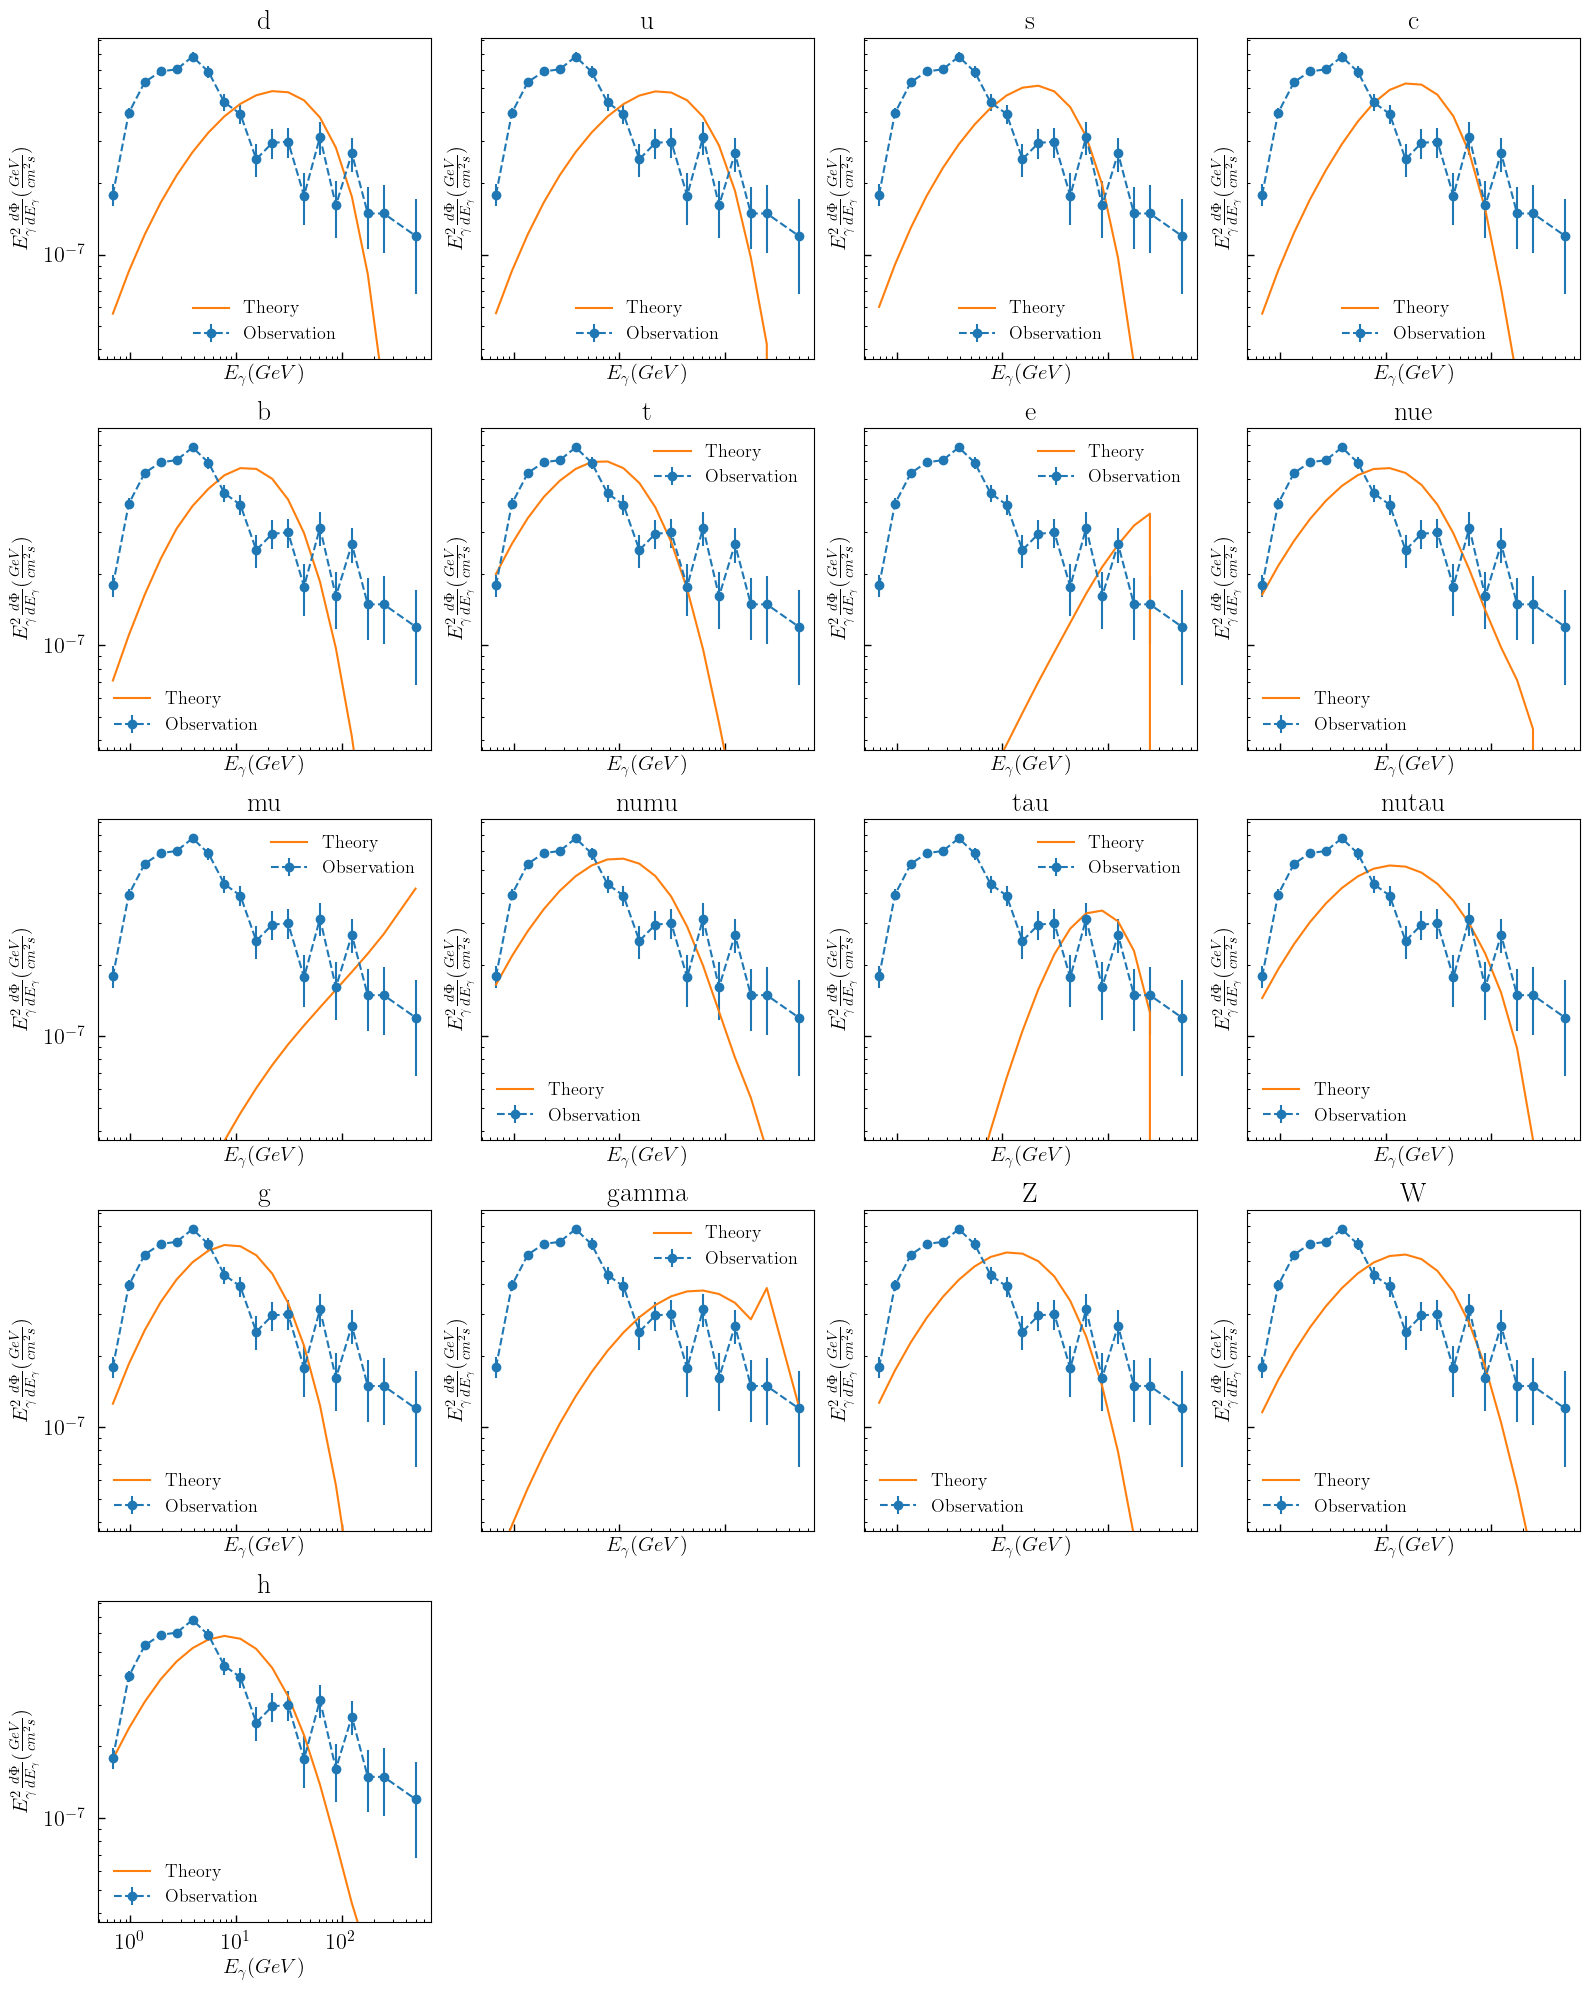

In [ ]:
# Define function to calculate the total differential flux for the best-fit particle and dark matter mass

def total_flux():
    """
    Calculates the total differential flux (E^2 * dPhidE) for the particle and dark matter mass
    corresponding to the best fit found earlier.

    Returns:
        array: Array containing the total differential flux for each energy bin (Ebin)
    """

    Rsc = 8.33  # kpc (distance of the the solar system from the center of the Milky Way)
    rhosc = 0.47  # GeV/cm^3 (characteristic density of the NFW profile)
    J = integrated_J_NFW

    # Extract best fit dark matter mass index and self-annihilation velocity from best_fit_ list
    m = best_fit_[range(len(particles)).index(p)][0]  # Dark matter mass index from best fit
    sv = best_fit_[range(len(particles)).index(p)][1]  # Crossection from best fit

    # Calculate total differential flux for each energy bin
    return Ebin**2 * 3.085677581 * 1e15 * sv / (8 * np.pi) * (Rsc * rhosc**2) / mDM[m]**2 * J * [y for y in dNdE_DM[p][m]]


# Calculate the number of rows and columns for the subplot grid
num_particles = 17
num_rows = num_particles // 4 + int(num_particles % 4 > 0)  # Ceiling division for number of rows
num_cols = min(num_particles, 4)  # Minimum between number of particles and desired columns

# Set up a figure and subplots for plotting
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4 * num_rows), sharex=True, sharey=True)

# Loop through each particle
for p in range(len(particles)):
    # Calculate row and column indices for the subplot based on particle index
    row = range(len(particles)).index(p) // 4  # Floor division for row index
    col = range(len(particles)).index(p) % 4  # Modulo operation for column index

    # Set the subplot title to the particle name
    axs[row, col].set_title(f'{particles[p]}')

    # Plot observed data with error bars
    axs[row, col].errorbar(Ebin, obs, yerr=[down_err, up_err], label='Observation', linestyle='--', marker='o')

    # Calculate total flux using the total_flux function
    total = total_flux()

    # Plot the calculated total differential flux
    axs[row, col].plot(Ebin, total, label='Theory')

    # Optionally add legend to each subplot
    axs[row, col].legend()

    # Set axis labels and formatting
    axs[row, col].set_xlabel(r'$E_\gamma (GeV)$', size=15)
    axs[row, col].set_ylabel(r'$E_\gamma^2\frac{d\Phi}{dE_\gamma} (\frac{GeV}{cm^2 s})$', size=15)
    axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    # axs[row, col].set_ylim([1e-8, 0.3e-5])  # Optional y-axis limits

# Remove any empty subplots if the number of particles is not a multiple of the subplot grid
for i in range(len(particles), (len(particles) // 4 + 1) * 4):
    fig.delaxes(axs.flatten()[i])

# Add a combined legend for the entire figure
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Chi-square test

* Reduced $\chi^2$

In [ ]:
# Initialize minimum chi-squared value (set to positive infinity)
chi_min = float('inf')

# Define a list of crossection (SV) values to explore in log-space
SV = np.logspace(-24, -22, len(mDM))

# Loop through each particle
for p in range(len(particles)):
    # Initialize a list to store chi-squared values for this particle across different dark matter masses and crossection
    list = []

    # Loop through each dark matter mass
    for m in range(len(mDM)):
        sublist = []
        for sv in SV:
            # Calculate the flux for the current particle, dark matter mass, and crossection
            x = E2dPhidE_func(dNdE_DM[p], sv)

            # Calculate the chi-squared value for the fit between the observed data and the calculated flux
            chi = chi2(obs, x)

            # Append the chi-squared value for this combination to the sublist
            sublist.append(chi)

        # Append the sublist containing chi-squared values for the current dark matter mass to the main chi2 list
        list.append(sublist)

    # Create a Pandas DataFrame from the 'list' containing chi-squared values
    Chi2DataFrame = pd.DataFrame(list)

    # Save the DataFrame as a CSV file for the current particle, using the particle name as the filename, set column labels from SV list
    Chi2DataFrame.to_csv('Chi2_modified/{}.csv'.format(particles[p]), header=SV, index=False)

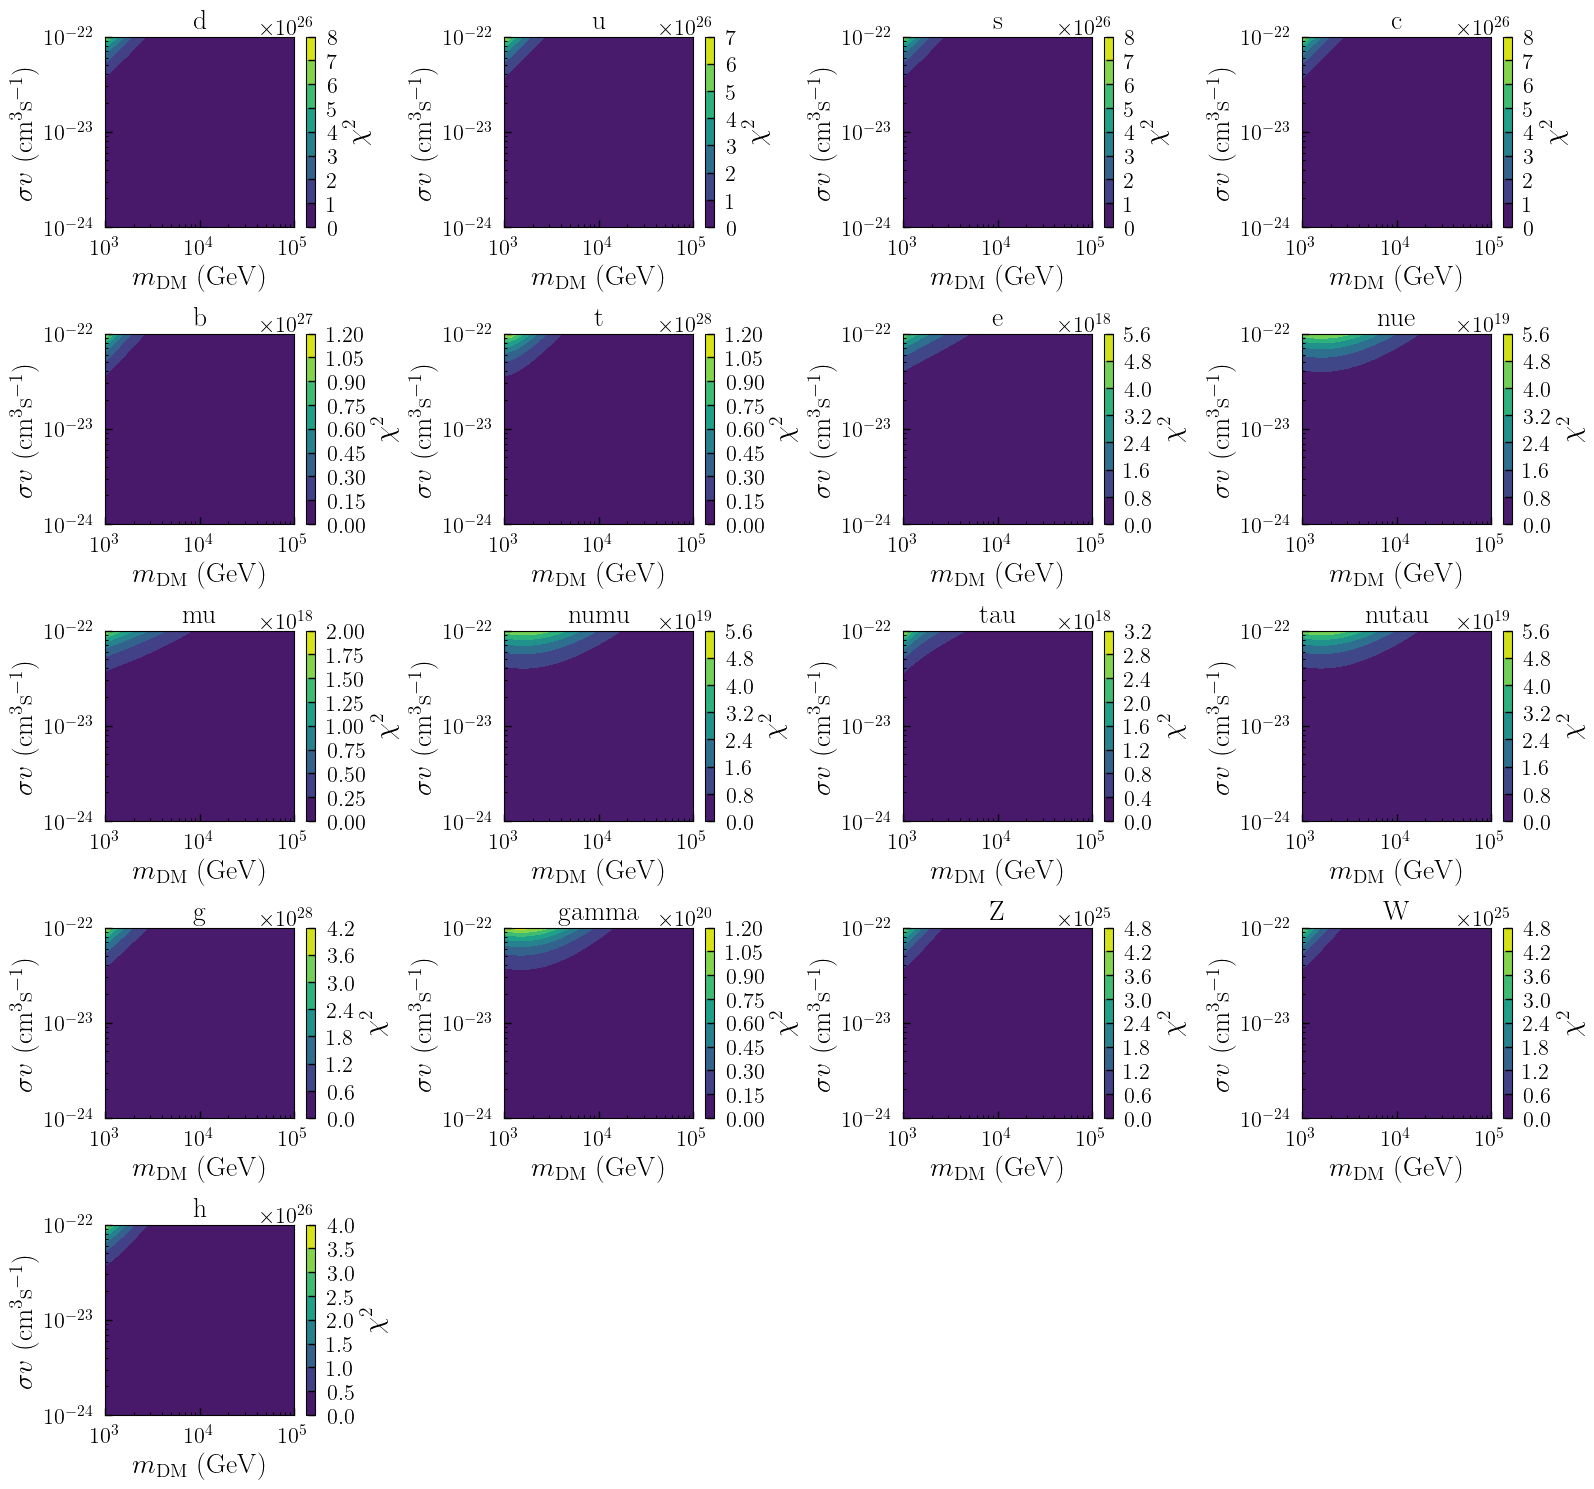

In [ ]:
# Create subplots for each particle
fig, axes = plt.subplots(nrows=len(particles)//4 + 1, ncols=4, figsize=(16, 3 * (len(particles)//4 + 1)))

for i, particle in enumerate(particles):
    row = i // 4  # Determine the row based on the floor division
    col = i % 4  # Determine the column based on the modulo operation
    Chi2 = pd.read_csv('Chi2_modified/{}.csv'.format(particle)).to_numpy()
    Chi2 = np.transpose(Chi2)

    # Plot the contour plot in the i-th subplot
    cs = axes[row, col].contourf(mDM, SV, Chi2)
    axes[row, col].set_title(f'{particle}')
    axes[row, col].set_xlabel(r'$m_{\mathrm{DM}} \ (\mathrm{GeV})$')
    axes[row, col].set_ylabel(r'$\sigma v \ (\mathrm{cm^3 s^{-1}})$')
    axes[row, col].set_xscale('log')
    axes[row, col].set_yscale('log')
    fig.colorbar(cs, ax=axes[row, col], label=r'$\chi^2$')

# Remove empty subplots
for i in range(len(particles), (len(particles)//4 + 1) * 4):
    fig.delaxes(axes.flatten()[i])

# Adjust layout to prevent overlapping
fig.tight_layout()
plt.show()


* Finding an Unknown Astroflux

In [ ]:
# Define a combined fitting function
def combination(x, sv, N, alpha, Ecut):
  """
    This function defines a combined model for the differential flux.

    Parameters:
        x (array): Array of energy values (Ebin)
        sv (float): crossection
        N (float): Normalization factor for the first term (power law)
        alpha (float): Power law index for the first term
        Ecut (float): Cutoff energy for the exponential term

    Returns:
        array: Array containing the combined differential flux for each energy bin (Ebin)
    """

  Rsc = 8.33 #kpc
  rhosc = 0.47 #GeV/cm^3
  J = integrated_J_NFW
  return N * x**(-alpha) * np.exp(-x/Ecut) + x**2 * 3.085677581*1e15 * sv/(8*np.pi) * (Rsc * rhosc**2)/mDM[m]**2 * J * [y for y in dNdE_DM[p][m]]

# Define the reduced-chisquare function (same as before)
def chi2(y_obs, y_exp):
    residuals = y_obs - y_exp
    error = down_err
    chisquare = np.sum((residuals/error)**2)
    dof = len(obs) - 5 # Number of parameters (N, alpha, Ecut, sv, m from dark matter mass list)
    reduced_chisquare = chisquare/dof
    return reduced_chisquare


# Find best fit parameters for each particle
best_fit = []
for p in range(len(particles)):

    # Initialize minimum chi-squared value
    chi_min = float('inf')
    for m in range(len(mDM)):

        # Use curve_fit to find optimal parameters for the combined function
        popt1, pcov1 = optimize.curve_fit(combination, Ebin, obs, maxfev=1000000000)

        # Calculate chi-squared for the current fit
        chi = chi2(obs, combination(Ebin, *popt1))

        # Update best fit parameters and chi-squared if a better fit is found
        if chi < chi_min:
            chi_min = chi
            a = m # Index corresponding to the dark matter mass in mDM list
            b, c, d, e = popt1  # Unpack the fitted parameters
    print('{}, chi2: {:,.3f}, m: {:,.3f} GeV, sv: {:,.3e}, N: {:,.3e}, alpha: {:,.3f}, Ecut: {:,.3f}'.format(particles[p], chi_min, mDM[a], b, c, d, e))
    best_fit.append([a, b, c, d, e])

<ipython-input-39-9b1430d75121>:20: RuntimeWarning: overflow encountered in exp
  return N * x**(-alpha) * np.exp(-x/Ecut) + x**2 * 3.085677581*1e15 * sv/(8*np.pi) * (Rsc * rhosc**2)/mDM[m]**2 * J * [y for y in dNdE_DM[p][m]]
<ipython-input-39-9b1430d75121>:20: RuntimeWarning: overflow encountered in power
  return N * x**(-alpha) * np.exp(-x/Ecut) + x**2 * 3.085677581*1e15 * sv/(8*np.pi) * (Rsc * rhosc**2)/mDM[m]**2 * J * [y for y in dNdE_DM[p][m]]
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-39-9b1430d75121>:20: RuntimeWarning: overflow encountered in multiply
  return N * x**(-alpha) * np.exp(-x/Ecut) + x**2 * 3.085677581*1e15 * sv/(8*np.pi) * (Rsc * rhosc**2)/mDM[m]**2 * J * [y for y in dNdE_DM[p][m]]
<ipython-input-39-9b1430d75121>:20: RuntimeWarning: invalid value encountered in multiply
  return 

d, chi2: 4.395, m: 1,917.910 GeV, sv: 1.744e-23, N: 4.959e-07, alpha: -1.139, Ecut: 2.702
u, chi2: 4.310, m: 2,009.233 GeV, sv: 1.745e-23, N: 4.953e-07, alpha: -1.127, Ecut: 2.748
s, chi2: 4.521, m: 2,782.559 GeV, sv: 1.824e-23, N: 4.985e-07, alpha: -1.097, Ecut: 2.879
c, chi2: 4.585, m: 3,199.267 GeV, sv: 1.678e-23, N: 5.001e-07, alpha: -1.080, Ecut: 2.966
b, chi2: 4.552, m: 4,037.017 GeV, sv: 1.770e-23, N: 5.076e-07, alpha: -1.107, Ecut: 2.861
t, chi2: 4.222, m: 5,857.021 GeV, sv: 2.287e-23, N: 5.029e-07, alpha: -1.173, Ecut: 2.593
e, chi2: 12.896, m: 1,000.000 GeV, sv: 5.807e-23, N: 4.617e-07, alpha: -0.548, Ecut: 7.717
nue, chi2: 3.770, m: 3,853.529 GeV, sv: 1.116e-21, N: 4.846e-07, alpha: -1.233, Ecut: 2.417
mu, chi2: 13.215, m: 1,000.000 GeV, sv: 1.029e-22, N: 4.603e-07, alpha: -0.534, Ecut: 7.949
numu, chi2: 3.855, m: 4,430.621 GeV, sv: 1.063e-21, N: 4.868e-07, alpha: -1.212, Ecut: 2.481
tau, chi2: 7.057, m: 1,000.000 GeV, sv: 1.829e-23, N: 4.817e-07, alpha: -0.818, Ecut: 4.622


* Total Flux

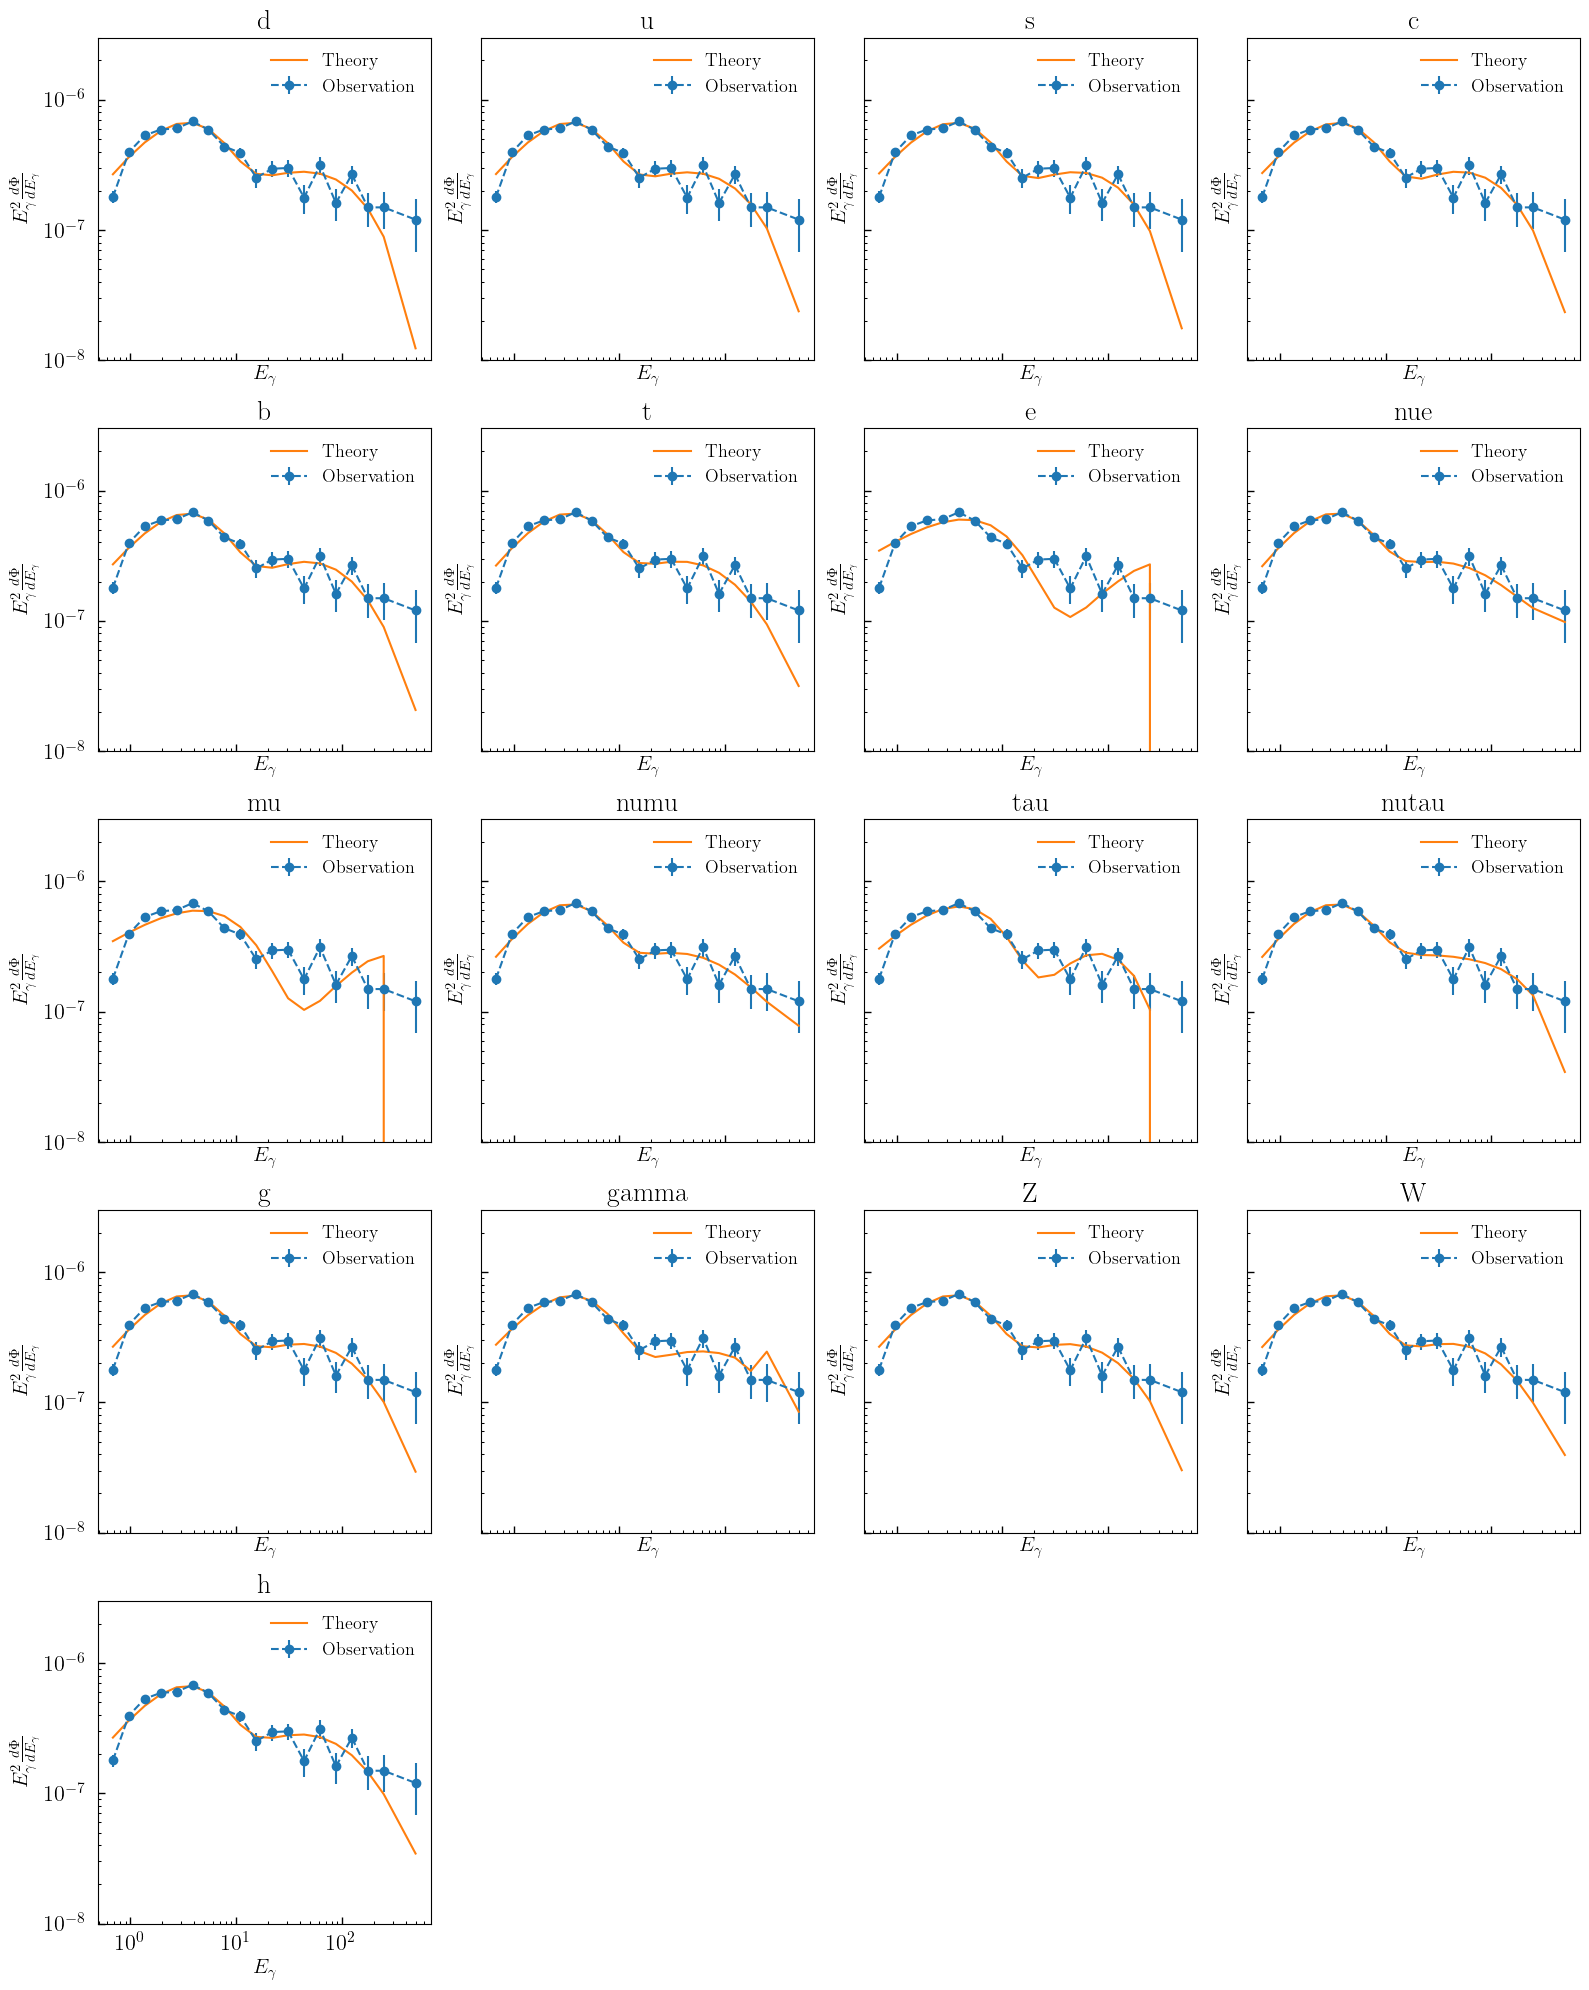

In [ ]:

def total_flux_combined():
    """
    Calculates the total differential flux (E^2 * dPhidE) for the best-fit particle and dark matter mass.

    Returns:
        array: Array containing the total differential flux for each energy bin (Ebin)
    """
    Rsc = 8.33 #kpc
    rhosc = 0.47 #GeV/cm^3
    J = integrated_J_NFW
    m = best_fit[p][0]  # Dark matter mass index from best fit
    sv = best_fit[p][1] # crossection from best fit
    N = best_fit[p][2]
    alpha = best_fit[p][3]  # Power law index from best fit
    Ecut = best_fit[p][4] # Cutoff energy from best fit
    return N * Ebin**(-alpha) * np.exp(-Ebin/Ecut) + Ebin**2 * 3.085677581*1e15 * sv/(8*np.pi) * (Rsc * rhosc**2)/mDM[m]**2 * J * [y for y in dNdE_DM[p][m]]

# Calculate the number of required rows and columns based on the number of particles
num_particles = len(particles)
num_rows = num_particles // 4 + int(num_particles % 4 > 0)  # Ceiling division
num_cols = min(num_particles, 4)

# Set up subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4 * num_rows), sharex=True, sharey=True)

for p, particle in enumerate(particles):
    row = p // 4  # Determine the row based on the floor division
    col = p % 4  # Determine the column based on the modulo operation
    axs[row, col].set_title(f'{particles[p]}')

    axs[row, col].errorbar(Ebin, obs, yerr=[down_err, up_err], label='Observation', linestyle='--', marker='o')

    total = total_flux()
    axs[row, col].plot(Ebin, total, label = 'Theory')

    # Optionally add legend to each subplot
    axs[row, col].set_xlabel(r'$E_\gamma$', size=15)
    axs[row, col].set_ylabel(r'$E_\gamma^2\frac{d\Phi}{dE_\gamma}$', size=15)
    axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_ylim([1e-8, 0.3e-5])
    axs[row, col].legend()

# Remove empty subplots
for i in range(num_particles, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


* Contour Plot

In [ ]:
# Define function to calculate total differential flux (DM + astrophysical) for a given particle and crossection
def total_flux_sv(dNdE, sv):
    Rsc = 8.33 #kpc
    rhosc = 0.47 #GeV/cm^3
    J = integrated_J_NFW
    N = best_fit[p][2]
    alpha = best_fit[p][3]
    Ecut = best_fit[p][4]
    return N * Ebin**(-alpha) * np.exp(-Ebin/Ecut) + Ebin**2 * 3.085677581*1e15 * sv/(8*np.pi) * (Rsc * rhosc**2)/mDM[m]**2 * J * dNdE[m]


# Define the reduced-chisquare function
def chi2(y_obs, y_exp):
    residuals = y_obs - y_exp
    error = down_err
    chisquare = np.sum((residuals/error)**2)
    dof = len(obs) - 5 # Number of parameters
    reduced_chisquare = chisquare/dof
    return reduced_chisquare


SV = np.logspace(-24, -20, len(mDM))


# Loop through each particle
for p in range(len(particles)):
    print(particles[p]) # Print particle name for reference

    # Initialize a list to store chi-squared values for different self-annihilation velocities for this particle
    list = []

    # Loop through each dark matter mass
    for m in range(len(mDM)):

        # Initialize a sublist to store chi-squared values for different crossection for this particle and dark matter mass
        sublist = []

        # Loop through each self-annihilation velocity in SV
        for sv in SV:
            # Calculate chi-squared for the fit between observed data and the total flux (DM + astro)
            chi = chi2(obs, total_flux_sv(dNdE_DM[p],sv))
            sublist.append(chi)

        # Append the sublist containing chi-squared values for the current dark matter mass to the main chi2 list
        list.append(sublist)
    Chi2DataFrame = pd.DataFrame(list)

    # Save the DataFrame as a CSV file for the current particle, using the particle name
    Chi2DataFrame.to_csv('Chi2_total_flux_modified/{}.csv'.format(particles[p]), header=SV, index=False)

d
u
s
c
b
t
e
nue
mu
numu
tau
nutau
g
gamma
Z
W
h


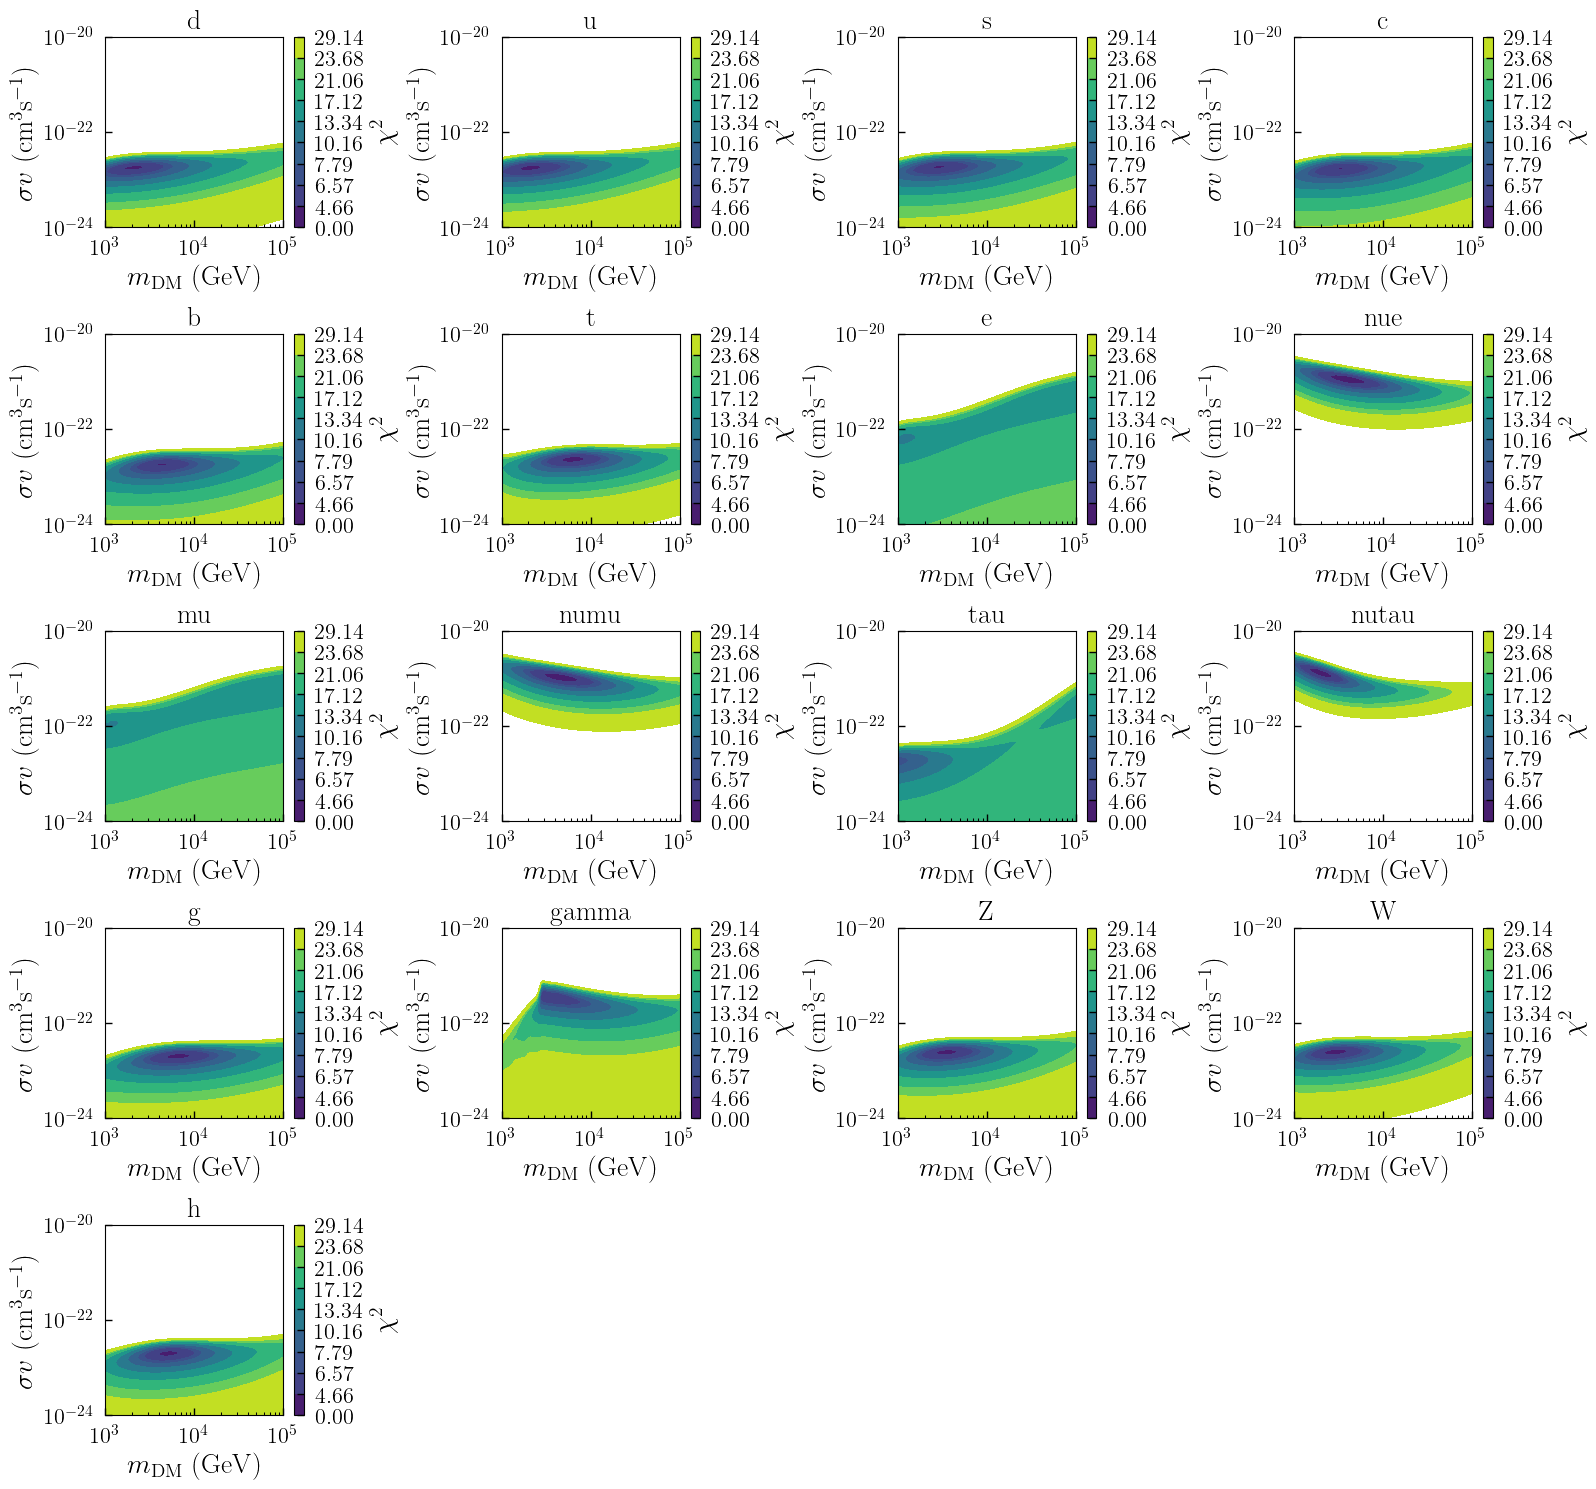

In [ ]:
levels = [0.0, 4.660, 6.571, 7.790, 10.165, 13.339, 17.12, 21.06, 23.68, 29.14]


# Create subplots for each particle
fig, axes = plt.subplots(nrows=len(particles)//4 + 1, ncols=4, figsize=(16, 3 * (len(particles)//4 + 1)))

for i, particle in enumerate(particles):
    row = i // 4  # Determine the row based on the floor division
    col = i % 4  # Determine the column based on the modulo operation
    Chi2_total = pd.read_csv('Chi2_total_flux_modified/{}.csv'.format(particle)).to_numpy()
    Chi2_total = np.transpose(Chi2_total)

    # Plot the contour plot in the i-th subplot
    cs = axes[row, col].contourf(mDM, SV, Chi2_total, levels=levels)
    axes[row, col].set_title(f'{particle}')
    axes[row, col].set_xlabel(r'$m_{\mathrm{DM}} \ (\mathrm{GeV})$')
    axes[row, col].set_ylabel(r'$\sigma v \ (\mathrm{cm^3 s^{-1}})$')
    axes[row, col].set_xscale('log')
    axes[row, col].set_yscale('log')
    fig.colorbar(cs, ax=axes[row, col], label=r'$\chi^2$')

# Remove empty subplots
for i in range(len(particles), (len(particles)//4 + 1) * 4):
    fig.delaxes(axes.flatten()[i])

# Adjust layout to prevent overlapping
fig.tight_layout()
plt.show()
